## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

**Answer:** <br>
There are total of 294,478 rows in the dataset.

In [3]:
df.shape #Get the shape of the data set. output: (#row, #col)

(294478, 5)

c. The number of unique users in the dataset.

**Answer:** <br>
There are 290,584 unique users in the dataset.

In [4]:
df.nunique() #Get the number of unique users. 

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

In [5]:
uniquetotal = df.user_id.nunique() #User_id is unique per user. 
uniquetotal

290584

d. The proportion of users converted.

**Answer:** <br>
12.1% of unique users converted. 

In [6]:
# 'converted' columns show whether the user is converted or not. 
# 1 = converted 
# 0 = not converted 

df.converted.value_counts()

0    259241
1     35237
Name: converted, dtype: int64

In [7]:
# Get total number of conversion by unique users 
uniqueconversion = df.query('converted == "1"').user_id.nunique()

In [8]:
# Get the conversion rate of unique users: 

uniqueconversion/uniquetotal

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't match.

**Answer:** <br>
`new_page` and `treatment` don't match 3,893 times.

In [9]:
df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].shape[0]

3893

f. Do any of the rows have missing values?

**Answer:** <br>
There is no missing value.

In [10]:
# Check for missing data on each column: No missing data will return 0's
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [11]:
df2 = df.loc[(df['group'] == 'treatment')== (df['landing_page'] == 'new_page')]

In [12]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

**Answer:** <br>
There are total of 290,584 unique **user_id**s in **df2**.

In [13]:
uniquetotal2 = df2.user_id.nunique() #User_id is unique per user. 
uniquetotal2

290584

b. There is one **user_id** repeated in **df2**.  What is it?

**Answer:** <br>
773192 appears twice in **df2**.

In [14]:
# Get unique value and indices
# uval = unique value 
# ind = unique indicies 
u_val, ind = np.unique(df2.user_id, return_index=True) 

# sor the indicies and find the missing index. 
# Missing index number shows the row with the duplicate user_id 
missingindex = sum(np.sort(ind) == np.arange(uniquetotal2))

# Find the duplicate user_id 
df2.iloc[missingindex]['user_id']

773192

c. What is the row information for the repeat **user_id**?

**Answer:** <br>
Duplicate appears in row 1899 and 2893. 

In [15]:
firstindex = df2.loc[df['user_id']==773192].index[:][0]
dupindex = df2.loc[df['user_id']==773192].index[:][1]
(firstindex ,dupindex)

(1899, 2893)

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [16]:
# Make copy to avoid "SettingWithCopyWarning"
df2 = df2.copy() 

# Drop the row with a duplicated user_id and use inplace to keep the dataframe as df2
df2.drop_duplicates(subset='user_id', keep='first', inplace=True)

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?
**Answer:** <br>
The probability of an individual converting regardless of the page they receive is 12.0%. 

In [17]:
# Get total number of rows with current df2 
total = df2.shape[0]

# Get total number of conversion 
total_converted = sum(df2['converted'])

# Get the rate of conversion 
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

**Answer:** <br>
The Pobability of conversion of individual in the `control` group is 12.0%.

In [18]:
# Get total number of individual in the control group 
ctrl = sum(df2['group'] == 'control')

# Get totla number of conversion in the control group 
ctrl_converted = sum((df2['group'] == 'control') & (df2['converted'] == 1))

# Get probability 
converstionrate_ctrl = ctrl_converted / ctrl
converstionrate_ctrl

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

**Answer:** <br>
The Pobability of conversion of individual in the `treatment` group is 11.9%.

In [19]:
# Get total number of individual in the control group 
treatment = sum(df2['group'] == 'treatment')

# Get totla number of conversion in the control group 
treatment_converted = sum((df2['group'] == 'treatment') & (df2['converted'] == 1))

# Get probability 
converstionrate_treatment = treatment_converted / treatment
converstionrate_treatment

0.11880806551510564

d. What is the probability that an individual received the new page?

**Answer:** <br>
The probability that an individual received the new page is 50.0%.

In [20]:
# Get total number of new page 
total_newpage = sum(df2['landing_page'] == 'new_page')

# Get probability 
total_newpage / total

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Answer:** <br>
From the results from 4a - 4d, it seems like there isn't sufficient evidence to conclude that the new treatment page leads to more conversions. 

The result shows 0.1% lower conversion rate in the treatment group. Not only because the treatment group has lower conversion rate compare to the treatment group, but also because the difference in the conversion rate between the two groups is only 0.1% when the total number of the data is more than 290,000, it seems like it is hard to conclude that the treatment page leads to more conversions. 

However, further statistical analysis would be need to understand the numbers. 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Answer:** <br>
$H_{0}$: $p_{new} - p_{old} \leq 0$ 
<br>
$H_{1}$: $p_{new} - p_{old} > 0$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

**Answer:** <br>
As stated above (PartII-c), the conversion rate for $p_{new}$ under the null is equal to the converted success rate regardless of page. Therefore, $p_{new}$ under the null is $ 0.1196 $

In [21]:
# From 4(a)
pnew_null = df2['converted'].mean()

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

**Answer:** <br>
As stated above (PartII-c), the conversion rate for $p_{old}$ under the null is equal to the converted success rate regardless of page. Therefore, $p_{old}$ under the null is $0.1196 $ 

In [22]:
# From 4(a)
pold_null = df2['converted'].mean()

c. What is $n_{new}$, the number of individuals in the treatment group?

**Answer:** <br>
$n_{new} = 145310$

In [23]:
# This number should be the same as number of individual in the treatment group
# because we removed all data that don't match between treamtment and new_page 

n_new = treatment
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

**Answer:** <br>
$n_{old} = 145274$

In [24]:
# This number should be the same as number of individual in the treatment group
# because we removed all data that don't match between control and old_page 

n_old = ctrl
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
new_page_converted = np.random.choice([0, 1], size=n_new, p=[1-pnew_null, pnew_null])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [26]:
old_page_converted = np.random.choice([0, 1], size=n_old, p=[1-pold_null, pold_null])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [27]:
new_page_converted.mean() - old_page_converted.mean()

-0.00021547288721254776

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [28]:
p_diffs = []
for _ in range(10000):
    sample_new = np.random.choice([0, 1], size=n_new, p=[1-pnew_null, pnew_null])
    sample_old = np.random.choice([0, 1], size=n_old, p=[1-pold_null, pold_null])
    p_diffs.append(sample_new.mean() - sample_old.mean())

In [29]:
# faster code without using loop (using numpy instead) - this was given from the project feedback

# sample_new = np.random.binomial(n_new, p_new,  10000)/n_new
# sample_old = np.random.binomial(n_old, p_old,  10000)/n_old
# p_diffs = new_converted_simulation - old_converted_simulation

In [30]:
# Standard deviation of the sampling distribution
np.std(p_diffs)

0.0012007036097181811

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

**Answer:** <br>
The plot is shown as expected. We simulated the closest value under the null to the alternative hypothesis. Therefore, we know it will be normally distributed by the Central Limit Theorem. 

In this example, the null hypothesized value of 0, and the standard deviation is 0. When you overlap the histogram simulated using the central location value, 0, and scale, the standard deviation, you can tell the shape of the plot is similar because both are showing normal distribution. 

(array([    7.,   100.,   435.,  1413.,  2713.,  2833.,  1752.,   610.,
          117.,    20.]),
 array([-0.00467533, -0.00376131, -0.00284729, -0.00193327, -0.00101925,
        -0.00010523,  0.00080879,  0.0017228 ,  0.00263682,  0.00355084,
         0.00446486]),
 <a list of 10 Patch objects>)

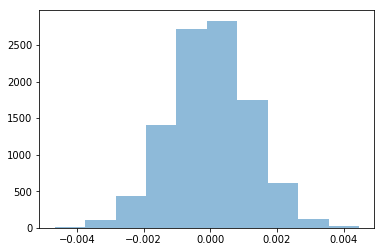

In [31]:
#Plot a histogram of the **p_diffs**
plt.hist(p_diffs, alpha=0.5) 

(array([   20.,   166.,   687.,  1760.,  2608.,  2554.,  1535.,   545.,
          107.,    18.]),
 array([ -4.23421360e-03,  -3.36909409e-03,  -2.50397457e-03,
         -1.63885506e-03,  -7.73735541e-04,   9.13839744e-05,
          9.56503490e-04,   1.82162301e-03,   2.68674252e-03,
          3.55186204e-03,   4.41698155e-03]),
 <a list of 10 Patch objects>)

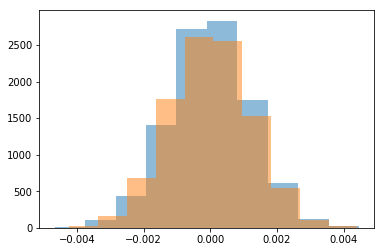

In [32]:
plt.hist(p_diffs, alpha=0.5) 

# Simulate normally distributed histogram using values calculated above 
null_vals = np.random.normal(0, np.std(p_diffs),10000) 

# Plot over the histogram above 
plt.hist(null_vals, alpha=0.5)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

**Answer:** <br>
Proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv** is 0.905.

In [33]:
# Calculate p-value

actual_diff = converstionrate_treatment - converstionrate_ctrl
(null_vals > actual_diff).mean()

0.90539999999999998

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer:** <br>
The value calculated in part j is called **p-value**. p-value the probability of observing your statistic if the null is true. In our example, we set the Type 1 Error rate to be 5% ($\alpha = 0.05$), p-value must be less than 0.05 to reject the null hypothesis. From the calculation, the p-value was close to 0.909; therefore, we failed to reject the null. This means that there is no conversion rate difference between the old and the new page or the conversion rate from the old page is higher than the new page. 

This suggest to keep using the old pages. 

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [34]:
import statsmodels.api as sm
# from statsmodels.stats.proportion import proportions_ztest

convert_old = ctrl_converted
convert_new = treatment_converted

# n_old and n_new were calculated above. 
n_old  
n_new;

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [35]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
z_score

-1.3109241984234394

In [36]:
p_value

0.90505831275902449

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer:** <br>

Negative z-score shows that the mean is less than the standard value. From the z-score table, p-value is about 0.9, which is similar to calulated p-value, 0.905. These values agree with the findings in part j and k. Values calculated in part m also failed to reject the null; therefore, the conversion rate on the old page is greater or equal to the conversion rate on the new page. 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer:**<br>
Logistic regression needs to be used. 

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [37]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [38]:
# Add intercept column 
df2['intercept'] = 1

In [39]:
# Add ab_page column 
df2[['control', 'treatment']] = pd.get_dummies(df2['group'])
df2 = df2.drop('control', axis=1)
df2.rename(columns={'treatment': 'ab_page'}, inplace=True)

In [40]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [41]:
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


In [42]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 22 May 2019   Pseudo R-squ.:               8.077e-06
Time:                        03:42:27   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [43]:
# exponentiate coefficient of ab_pabe
np.exp(-0.0150)

0.98511193960306265

**Answer:** <br>
By exponentiating the coefficient variable, the result shows that conversion is 0.99 times as likely on the new page than the old page holding all else constant. 

Because 0.99 is close to 1, it shows that there isn't much difference in conversion rate between old and new pages. This is supported by $P>|z|$ value as well. P value is large and ab_page is not significantlly related to the response variable, `convert`.

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Answer:** <br>
p-value associated with ab_page (0.190) is different than what was calculated in Part II because the null and alternative hypotheses are set differently. In the regression model, it tests wether the explanatory variable is in relation with the response variable or not, which means it uses two-tailed test, meaning hypothesis in the regression model are following: 

$H_{0}$: $p_{new} - p_{old} = 0$ 
<br>
$H_{1}$: $p_{new} - p_{old} \neq 0$


I Because the hyothesis testing in Part II is one-tailed test (hypothesis can be found in the answer to the Part II (a) question) , this difference causes the difference in p-values between Part II and III.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer:** <br>
It is always a good idea to consider other factors to add into the regression model, because often times the result is dependent on many different factors. However, when taking additional terms into the regression model, there is higher change to make a mistake in interpretation or prediction. 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

**Answer:** <br>

From the result below, followings can be interpreted: 
1. If an user is from US, they are 1.04 times more likely to convert than if they are from CA, holding all other variables constant.
2. If an user is from US, they are 0.99 times more likely to convert than if they are from UK, holding all other variables constant.
3. P-values are large therefore geo-location is not significantly related to the conversion rate 
Overall, this suggests using the old page in all geo-locations. 

In [44]:
df_countries = pd.read_csv('countries.csv')
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [45]:
# Append country 
df3 = df2.join(df_countries.set_index('user_id'), on='user_id')
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [46]:
# Add dummy columns 
df3[['CA', 'UK', 'US']] = pd.get_dummies(df3['country'])
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1


In [47]:
log_mod_countries = sm.Logit(df3['converted'], df3[['intercept', 'CA', 'UK']])
results_countries = log_mod_countries.fit()
results_countries.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Wed, 22 May 2019   Pseudo R-squ.:               1.521e-05
Time:                        03:43:25   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

In [48]:
np.exp(results_countries.params)

intercept    0.135779
CA           0.960018
UK           1.009966
dtype: float64

In [49]:
1/(np.exp(results_countries.params))

intercept    7.364925
CA           1.041647
UK           0.990133
dtype: float64

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

**Answer:** <br>
In the model below the baseline is the US users receiving the old page. and followings can be interpreted:

1. If an user is from US and see the old page, they are 1.02 times more likey to convert than if they are from CA regardless of the page type, holding all other variables constant.
2. If an user is from US and see the old page, they are 1.05 times more likey to convert than if they are from CA and see new pages, holding all other variables constant.
3. If an user is from US and see the old page, they are 1.01 times more likey to convert than if they are from UK regardless of the page type, holding all other variables constant.
4. If an user is from US and see the old page, they are 0.97 times more likey to convert than if they are from UK and see new pages, holding all other variables constant.
5. If an user is from US and see the old page, they are 1.02 times more likey to convert than if they are from seeing the new page regardless of the geo-location, holding all other variables constant.
6. P-values are large therefore geo-location is not significantly related to the conversion rate Overall; therefore, failed to reject the null. This suggests using the old page in all geo-locations.

In [50]:
# Create interaction columns to see interaction between pages and the geo-locations
df3['US_ab_page'] = df3['US'] * df3['ab_page']
df3['UK_ab_page'] = df3['UK'] * df3['ab_page']
df3['CA_ab_page'] = df3['CA'] * df3['ab_page']
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US,US_ab_page,UK_ab_page,CA_ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1,0,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1,0,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,1,0,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,1,0,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1,0,0,0


In [51]:
log_mod_interaction = sm.Logit(df3['converted'], df3[['intercept', 'ab_page', 'CA', 'CA_ab_page', 'UK', 'UK_ab_page']])
results_interaction = log_mod_interaction.fit()
results_interaction.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Wed, 22 May 2019   Pseudo R-squ.:               3.482e-05
Time:                        03:43:36   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
CA_ab_page    -0.0469      0.054     -0.872      0.383      -0.152       0.059
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
UK_ab_page     0.0314      0.027      1.181      0.238      -0.021       0.084
==============================================================================
"""

In [52]:
np.exp(results_interaction.params)

intercept     0.137178
ab_page       0.979646
CA            0.982625
CA_ab_page    0.954198
UK            0.994272
UK_ab_page    1.031896
dtype: float64

In [53]:
1/(np.exp(results_interaction.params))

intercept     7.289813
ab_page       1.020776
CA            1.017682
CA_ab_page    1.048001
UK            1.005761
UK_ab_page    0.969090
dtype: float64

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])